In [11]:
import SimpleITK as sitk
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 计算所有小肿瘤的实际体积
volumn_List=[]

gt_small_tumor_path = r"C:\Users\DELL\Desktop\dataset\new_dataset\Dataset002_smalltumor\labelsTr"

gt_name = os.listdir(gt_small_tumor_path)

for name in gt_name:
    label_image_path = os.path.join(gt_small_tumor_path ,name)
    mask = sitk.ReadImage(label_image_path)
    x,y,z = mask.GetSpacing()
    Matrix_ = sitk.GetArrayFromImage(mask)
    num_voxel = np.sum(Matrix_)
    physical_volumn = round(num_voxel*x*y*z/1000,2)
    volumn_List.append(physical_volumn)

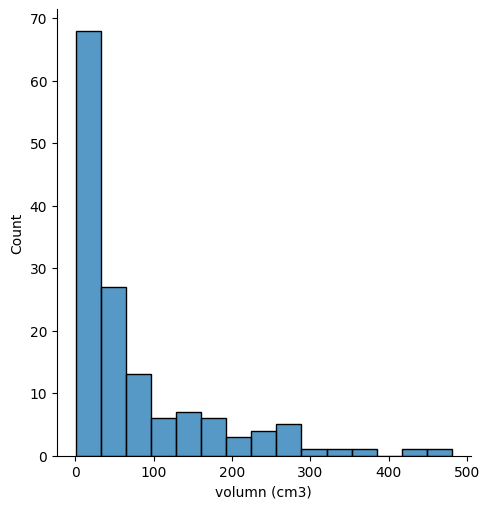

In [17]:
# 绘制直方图
sns.displot(volumn_List)
plt.savefig('./volumn_frequency.png')
plt.xlabel('volumn (cm3)')
plt.show()
plt.close()

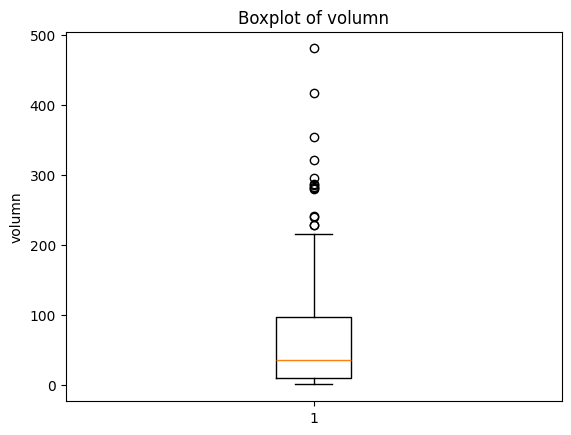

In [14]:
# 绘制箱线图
plt.boxplot(volumn_List)
plt.title('Boxplot of volumn')
plt.ylabel('volumn')
plt.savefig('./volumnBox.png')
plt.show()

In [16]:
# 计算均值和方差
print(f"the mean volumn of {len(volumn_List)} small tumors is {round(np.mean(volumn_List),2)} (cm3)")
print(f"the variance volumn(cm3) of {len(volumn_List)} small tumors is {round(np.var(volumn_List),2)}")

the mean volumn of 144 small tumors is 74.28 (cm3)
the variance volumn(cm3) of 144 small tumors is 8803.79
